# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [27]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    channel_data = pd.DataFrame(data['Channel'], columns=['Channel'])
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [28]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [29]:
from numpy.random import randint as np_rand

# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [287, 215, 352]
print "Indices: ", indices

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Indices:  [287, 215, 352]
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,15354,2102,2828,8366,386,1027
1,2806,10765,15538,1374,5828,2388
2,608,1106,1533,830,90,195


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

**For the first customer (index 287), the quantities for Fresh, Frozen and Delicatessen items are around or above the 75th percentile. The remaining items (Milk, Grocery, and Detergents_Paper) fall in the 25th percentile. To me, this mix seems to indicate that this might be a grocery market as they seem to sell good amounts of all items, but mostly Fresh, Frozen, and Delicatessen.**

**The second customer (index 215) is in the 75th percentile for Milk, Grocery, Detergents_Paper, and Delicatessen, 25th percentile for Frozen items, and below 25th for Fresh items. As the quantities are so large for the first set of items, including Detergents_Paper, but low for Fresh and Frozen, this indicates the customer may be a wholesale retailer.**

**The third customer (index 608) is in the first quartile for Fresh, Milk, Grocery, Detergents_Paper, and Delicatessen, and 25th percentile for Frozen items. The low quantities here seem to indicate that this is a small customer, perhaps something like a small corner market.**

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

Fresh -0.334874993411
Milk 0.173330605806
Grocery 0.625703685304
Frozen 0.146982038836
Detergents_Paper 0.722717896844
Delicatessen -13.4221734376


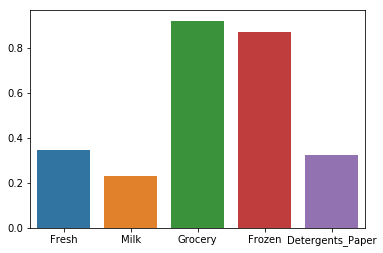

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

def feature_scores(label_feature):
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([label_feature], axis=1)

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[label_feature], test_size=0.25, random_state=0)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)
    #display(pd.DataFrame(regressor.predict(X_test), y_test))

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print label_feature, score
    
    axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')sns.barplot(X_train.columns, regressor.feature_importances_)
    
for item in data.columns.values:
    feature_scores(item)

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
**I ran a prediction for all of the features. For Fresh and Delicatessen items, the R^2 scores were negative, indicating that these items could NOT be predicted from the other features, meaning that these features are independent and necessary to use in identifying customer habits. For Grocery and Detergents_Paper, the high scores of .6257 and .7227, respectively, show that these features were predictable from other features and so aren't as important to determining customer habits as they are somewhat redundant. Milk and Frozen items had low R^2 scores, so they seem to be somewhat predictable from other features, but are probably still important in being used to predict customer habits.**

In [31]:
import seaborn as sns
sns.barplot(X_train.columns, regressor.feature_importances_)

NameError: name 'X_train' is not defined

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/home/marka/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


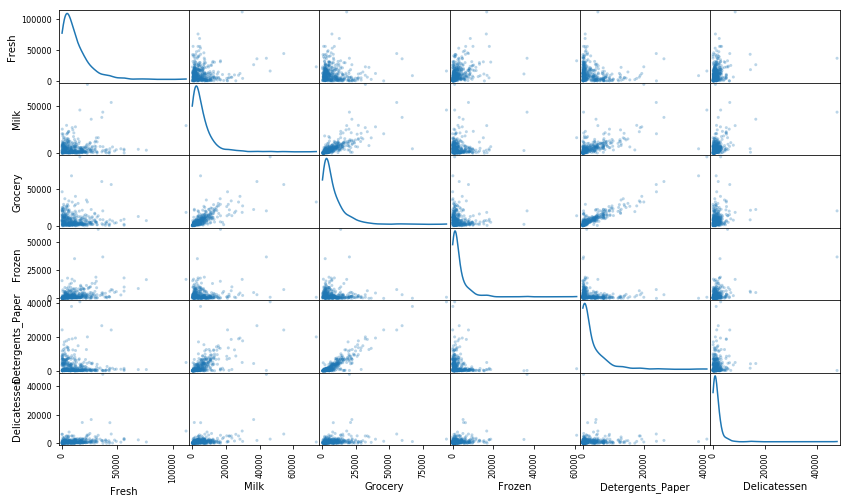

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

/home/marka/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


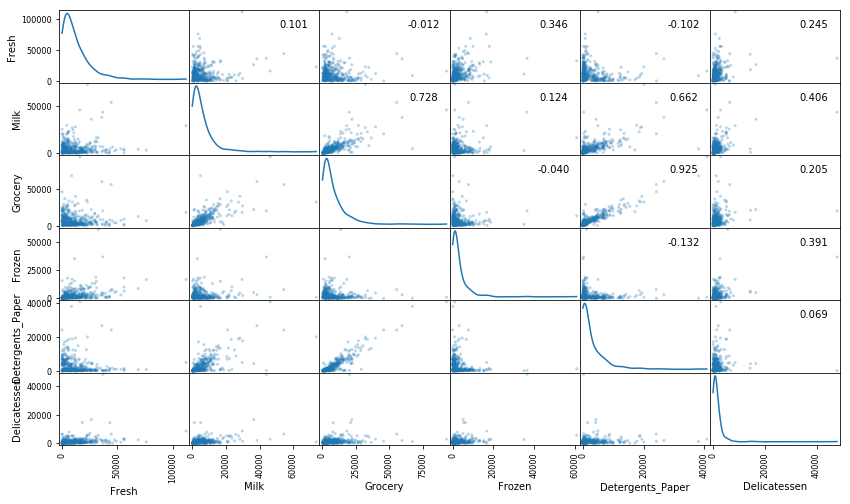

In [33]:
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


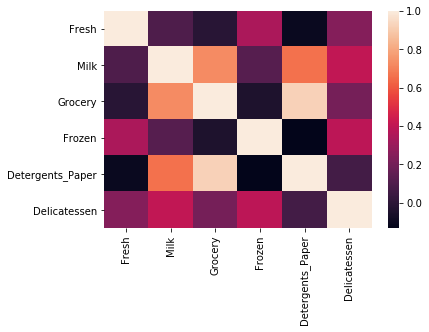

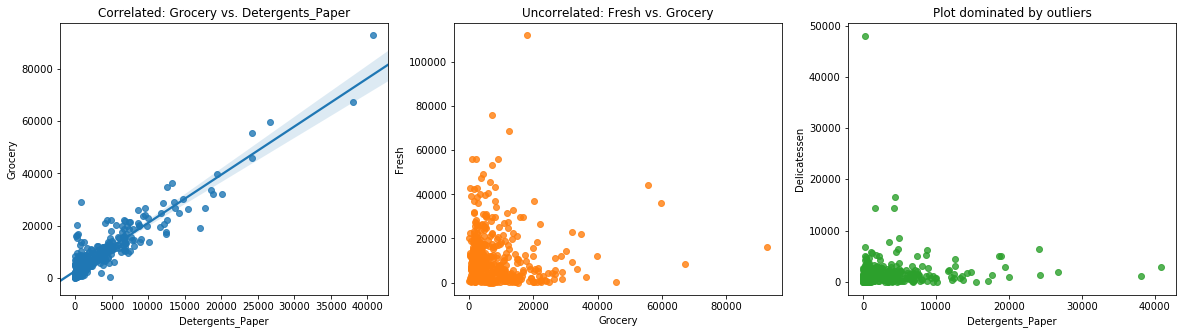

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

data_correlation = data.corr()

display(data_correlation)

sns.heatmap(data_correlation)

fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.regplot(y='Grocery', x='Detergents_Paper', data=data, ax=axs[0]).set_title("Correlated: Grocery vs. Detergents_Paper")
sns.regplot(y='Fresh', x='Grocery', data=data, fit_reg=False, ax=axs[1]).set_title("Uncorrelated: Fresh vs. Grocery")
sns.regplot(y='Delicatessen', x='Detergents_Paper', data=data, fit_reg=False, ax=axs[2]).set_title("Plot dominated by outliers")


### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer: In the scatter plot matrix, we see a variety of correlated and uncorrelated combinations of features. In all of the plots, which are log-normal, a majority of the points are compressed near the origin due to outliers.**

**In some of the plots, i.e. Grocery vs. Detergents_Paper, we do see a strong formation of points indicating correlation. As supported by the correlation table and heat map, the graphs that exhibit correlation are those of Grocery vs. Detergents_Paper, Grocery vs. Milk, and Milk vs. Detergents_Paper. These correlations seem to indicate the R^2 prediction scores that were strong for Grocery (.6257) and Detergents_Paper (.7227)**

**The remaining tables, like that of Fresh vs. Grocery, don't seem to show any groupings to indicate correlation. Again, this is supported by metrics seen in the correlation table and heat map.**

**However, many of the plots show that majority of the points are compressed near the origin as there are large outliers. This is strongly exhibited in the scatter plot for Delicatessen vs. Detergents_Paper. Further, all of the plots that include Delicatessen seem to be compressed due to a very large Delicatessen outlier. There remains a possibility that some correlations are hiding in the data because of the domination of the outliers, and this compression may explain why the R^2 prediction score was so low (-13.422) for Delicatessen as compared to the other features.**

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/home/marka/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


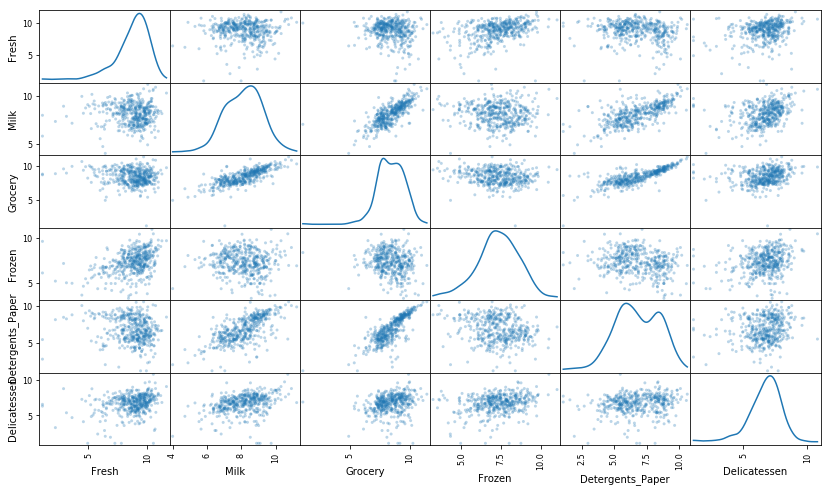

In [12]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(data.loc[indices])

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [13]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
287,9.639131,7.650645,7.947325,9.031931,5.955837,6.934397
215,7.939515,9.284055,9.651044,7.225481,8.670429,7.778211
352,6.410175,7.008505,7.334982,6.721426,4.499810,5.273000


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [25]:
from collections import Counter

print "Indices: ", indices

outlier_counter = Counter()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    print "IQR: ", Q3-Q1, ": ", Q1, " to ", Q3, " ---Low 1.5x range:", Q1-step, "---High 1.5x range:", Q3+step
    this_feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outlier_counter.update(this_feature_outliers.index.values)
    display(this_feature_outliers)
    #print outlier_counter
    
print "The most frequent outliers: ", [[x, outlier_counter[x]] for x in outlier_counter.keys() if outlier_counter[x] > 1]
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [95,338,66,218,96,357, 75]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

channel_data = channel_data.drop(channel_data.index[outliers]).reset_index(drop = True)

Indices:  [287, 215, 352]
Data points considered outliers for the feature 'Fresh':
IQR:  1.68900524574 :  8.04805870221  to  9.73706394795  ---Low 1.5x range: 5.51455083361 ---High 1.5x range: 12.2705718166


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':
IQR:  1.54549884855 :  7.33498124004  to  8.88048008859  ---Low 1.5x range: 5.01673296722 ---High 1.5x range: 11.1987283614


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':
IQR:  1.59923747586 :  7.67461620137  to  9.27385367724  ---Low 1.5x range: 5.27575998758 ---High 1.5x range: 11.672709891


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':
IQR:  1.56621833401 :  6.60967774917  to  8.17589608318  ---Low 1.5x range: 4.26035024816 ---High 1.5x range: 10.5252235842


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':
IQR:  2.72623917396 :  5.54810142479  to  8.27434059875  ---Low 1.5x range: 1.45874266385 ---High 1.5x range: 12.3636993597


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':
IQR:  1.49485376961 :  6.01187465693  to  7.50672842655  ---Low 1.5x range: 3.76959400251 ---High 1.5x range: 9.74900908097


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


The most frequent outliers:  [[128, 2], [154, 3], [65, 2], [66, 2], [75, 2]]


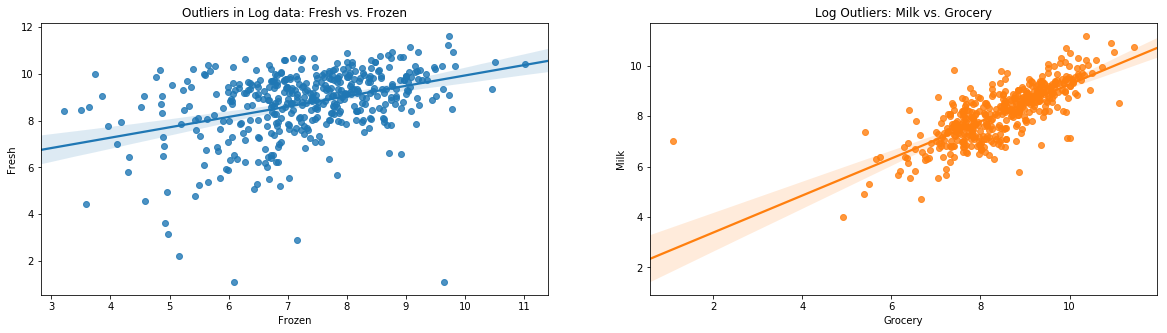

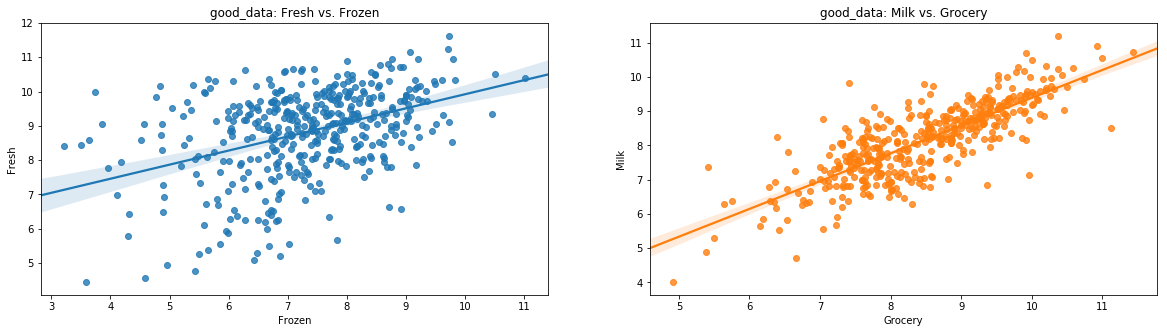

In [444]:
fig, axs = plt.subplots(ncols=2, figsize=(20,5))
sns.regplot(y='Fresh', x='Frozen', data=log_data, fit_reg=True, ax=axs[0]).set_title("Outliers in Log data: Fresh vs. Frozen")
sns.regplot(y='Milk', x='Grocery', data=log_data, fit_reg=True, ax=axs[1]).set_title("Log Outliers: Milk vs. Grocery")

fig, axs = plt.subplots(ncols=2, figsize=(20,5))
sns.regplot(y='Fresh', x='Frozen', data=good_data, fit_reg=True, ax=axs[0]).set_title("good_data: Fresh vs. Frozen")
sns.regplot(y='Milk', x='Grocery', data=good_data, fit_reg=True, ax=axs[1]).set_title("good_data: Milk vs. Grocery")

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

#### **Answer:**

**Tukey's method for identifying outliers was used to indicate data as an outlier if it falls outside of the interquartile range (IQR) when it is 1.5 times the IQR. Five of these indicies were noted as outliers for multiple features: 128, 154, 65, 66, and 75. Index 128 and 66 are outliers for Fresh and Delicatessen. Index 154 is an outlier for Milk, Grocery, and Delicatessen. Index 65 is an outlier for Fresh and Frozen. Index 75 is an outlier for Grocery and Detergents_Paper. In general, I don't believe that data points which are outliers for more than one feature should be removed from a data set, as in this case, it might indicate a different type of customer. This extreme point may represent some interesting statistic. However, contrary to this belief, index 75 was removed as detailed below.**

**Outliers can throw off the calculations of PCA, since principal components are chosen according to those dimensions with the greatest variation. An outlier could thus skew a principal component into the wrong direction. In K-means clustering, outliers can alter the locations of the centroid from the true center of the clusters, causing misclassification of some data points.**

**Six low outliers were removed from the Fresh data set (which were more than 2.5x the IQR) as they were causing the data points to be compressed towards the high side. After removing these points, the scatter plot distribution is more normal, as seen in the bottom left graph above.**

**One extreme low Grocery outlier (indice 75, more than 4 x the IQR) was removed, which by itself was causing data points to be extremely compressed to the high side. This outlier was removed, even though it was a also an outlier in Detergents_Paper, because it was having such an extrememe effect on Grocery data, as seen in the bottom right graph above.**

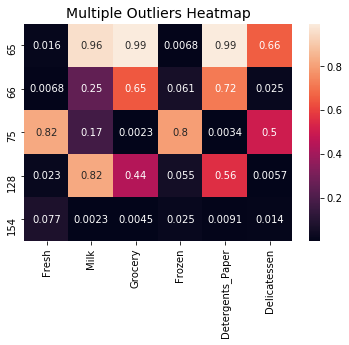

In [34]:
# Heatmap using percentiles to display outlier data
import matplotlib.pyplot as plt
import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = percentiles.iloc[[65, 66, 75, 128, 154]]
plt.title('Multiple Outliers Heatmap', fontsize=14)
heat = sns.heatmap(percentiles, annot=True)
display(heat)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

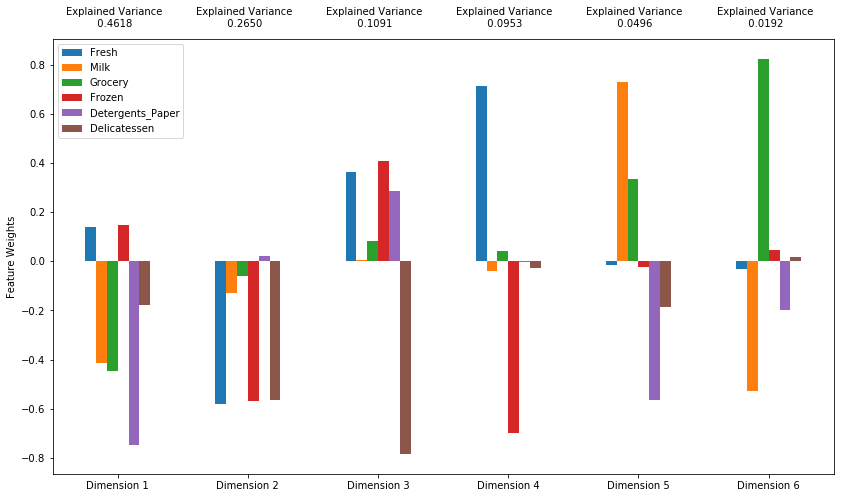

In [445]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [446]:
display(pca_results)

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4618,0.1381,-0.4135,-0.4448,0.1487,-0.7470,-0.1789
Dimension 2,0.2650,-0.5825,-0.1308,-0.0590,-0.5680,0.0216,-0.5630
Dimension 3,0.1091,0.3627,0.0047,0.0807,0.4068,0.2853,-0.7843
Dimension 4,0.0953,0.7133,-0.0390,0.0420,-0.6979,-0.0035,-0.0294
Dimension 5,0.0496,-0.0143,0.7300,0.3338,-0.0247,-0.5658,-0.1865
Dimension 6,0.0192,-0.0332,-0.5268,0.8240,0.0454,-0.2002,0.0170


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer: 72.68% of the variance is explained by the first and second principal components. 93.12% of the variance is explained by the first four principal components.**

**The first principal component (Dimension 1) accounts for 46.18% of the total variance. The most pronounced weighting in the first prinicpal component is from the Detergents_Paper feature, with significant weightings on Milk and Grocery. These are negative weightings, meaning that spending on these products increase in the direction of decrease in the principal component. Therefore, this first dimension best represents customers that mostly buy Detergents_Paper, Milk and Grocery.**

**The second principal component (Dimension 2) accounts for the next 26.5% of the total variance. There are three significant, equally negatively weighted features represented by this principal component: Fresh, Frozen and Delicatessen. This indicates that customer data that falls towards the extreme negative direction on this 2nd principal component axis spend more on Fresh, Frozen, and Delicatessen items.**

**The third principal component (Dimension 3) accounts for 10.9% of the total variance. On this principal component axis, there is a significant negatively weight on the Delicatessen Feature, with some meaningful positively weighted features: Fresh, Frozen, and Detergents_Paper. So, on this axis, data in the negative direction would indicate increased spending on Delicatessen items, where as Fresh, Frozen, and Detergents_Paper would be indicated by data in the positive direction.**

**The forth principal component (Dimension 4) accounts for 9.53% of the total variance. On this principal component axis, there are two significant feature weightings: a positive weight on Fresh, and a negative weight on Frozen. Therefore, this pinicipal component axis would separate consumer spending between Fresh and Frozen, with increased spending on Fresh in the positive direction from the origin, and increased spending on Frozen in the negative direction.**

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [447]:
print "Original sample data:"
display(samples)

# Display sample log-data after having a PCA transformation applied
print "\nPCA transformed sample data:"
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Original sample data:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,15354,2102,2828,8366,386,1027
1,2806,10765,15538,1374,5828,2388
2,608,1106,1533,830,90,195



PCA transformed sample data:


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.3728,-1.5271,0.5130,-0.6201,-0.1451,0.0647
1,-2.7425,-0.2415,-0.5807,-0.5982,-0.0084,0.0533
2,2.5061,2.6903,-0.7628,-1.2575,0.4185,0.1641


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [448]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [449]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.3728,-1.5271
1,-2.7425,-0.2415
2,2.5061,2.6903


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

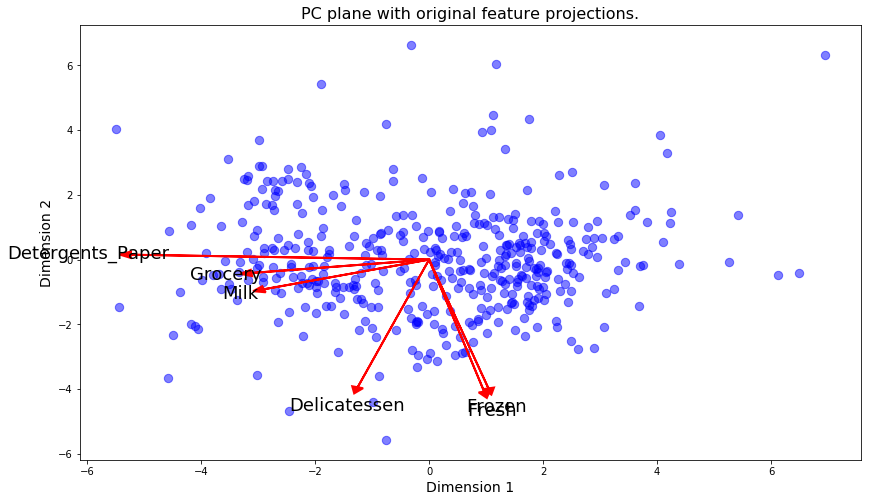

In [450]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

In [451]:
display(pd.DataFrame(pca.components_.T,index=good_data.columns.values))

,0,1
Fresh,0.138061,-0.582515
Milk,-0.413517,-0.130765
Grocery,-0.444814,-0.058953
Frozen,0.148746,-0.568022
Detergents_Paper,-0.746961,0.021566
Delicatessen,-0.178905,-0.563016


### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

**Some advantages of K-Means clustering are:**
 - easy to implement
 - easy to interpret clustering reults
 - computationally fast/efficient

**Some disadvantages of K-Means clustering are:**
 - Data points belong entirely to one cluster
 - Assumes spherical clusters with relatively same size
 - may work poorly with clusters that have different densities
 - sensitive to outliers

**Advantages of Gaussian Mixture Model clustering are:**
 - Soft clustering allows data points to have membership in multiple clusters
 - Can detect clusters with shapes that are not only spherical 

**Disadvantages of Gaussian Mixture Model clustering are:**
 - more difficult to interpret because of probabiltiy weightings
 - doesn't work well with high dimensionality
 
** I believe that the Gaussian Mixure Model may be the best choice for our dataset as the biplot above shows that clusters may not be spherical, nor well separated. Therefore, soft clustering may be the best choice.**

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [540]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters = 2, random_state=0).fit(reduced_data)
GMclusterer = GaussianMixture(n_components = 2, random_state=0, covariance_type='diag').fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
GMpreds = GMclusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_
GMcenters = GMclusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
GMsample_preds = GMclusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
GMscore = silhouette_score(reduced_data, GMpreds)
print "K-Means Silhouette score: {:.4f}".format(score)
print "GaussianMixture Silhouette score: {:.4f}".format(GMscore)

K-Means Silhouette score: 0.4260
GaussianMixture Silhouette score: 0.4245


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer: For K-Means and Gaussian Mixture clustering, n_clusters/n_components of 2 to 10 were tried. The table below shows the respective silhouette scores:**

| n_clusters/n_components: | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| **K-Means silhouette score** | .4260 | .3391 | .3331 | .3469 | .3667 | .3637 | .3633 | .3547 | .3578 |
| **Gaussian Mixture silhouette score** | .4245 | .4083 | .3739 | .3119 | .3084 | .3323 | .3388 | .2742 | .2947 |

**In the silhouette scores above, the scores for both K-Means and Gaussian Mixture models indicate that the dataset is best broken into 2 clusters.**

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

Kmeans clustering:


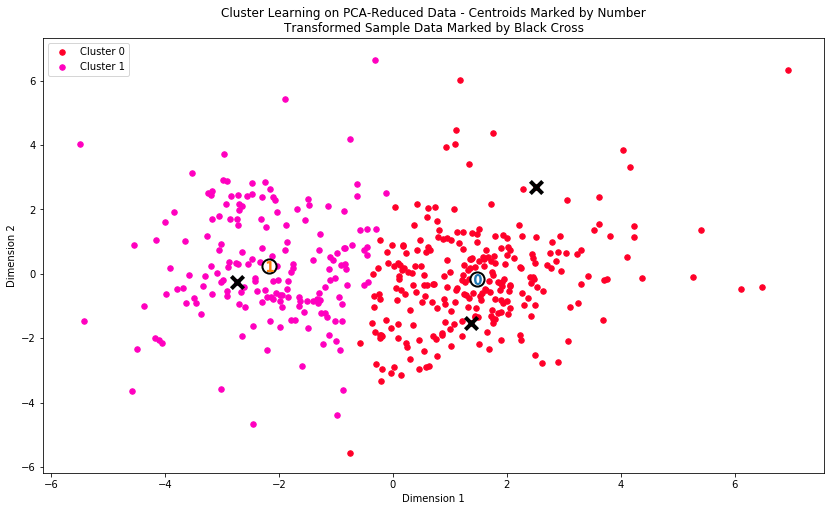

In [541]:
# Display the results of the clustering from implementation
print "Kmeans clustering:"
vs.cluster_results(reduced_data, preds, centers, pca_samples)



GaussianMixture clustering:


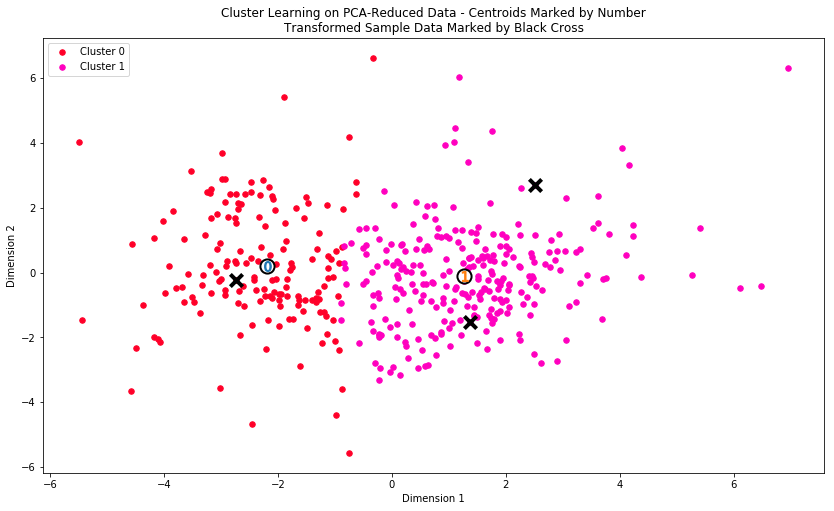

In [542]:
# Display the results of the GaussianMixture clustering from implementation
print "\n\nGaussianMixture clustering:"
vs.cluster_results(reduced_data, GMpreds, GMcenters, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [550]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print "True centers, inverse_transformed:"
display(true_centers)


True centers, inverse_transformed:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9126.0,1883.0,2435.0,2056.0,294.0,669.0
Segment 1,4317.0,8135.0,12159.0,941.0,4607.0,1021.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

**For the Segment 0 centroid, totals for Fresh and Frozen are between the 50th and 75th percentiles, while the remaining features are below median in the 25th to 50th percentiles. This emphasis on Fresh/Frozen may be found in customers that prepare the fresh/frozen foods for consumption, and so are likely to be places like cafes or restaurants.**

**Meanwhile, the totals for the Segment 1 centroid are contrary to those of Segment 0. Fresh/Frozen totals are below median (25th to 50th percentile), Delicatessen is above median (50th to 75th percentile) and the remaing (Milk/Grocery/Detergents_Paper) are above the 75th percentile. This bulk spending seems indicative of large or wholesale markets.**

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [551]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
print "\nOriginal sample data:"
display(samples)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0

Original sample data:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,15354,2102,2828,8366,386,1027
1,2806,10765,15538,1374,5828,2388
2,608,1106,1533,830,90,195


**Answer:**

**The first sample totals are above median for Fresh, Frozen, and Delicatessen. The remaining feature totals are below median. Therefore, I would expect the first sample to be Segment 0.**

**The second sample totals are are below median for Fresh and Frozen, and above median for the remaining features, which matches what was seen for Segment 1 data.**

**The third sample below or near the 25th percentile for all features. I would assume that this most closely matches Segment 0.**

**These assumptions are consistent with the sample predictions above.**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

**The wholesale distributor could use the customer segments to help determine which customers would react positively to changes in delivery service. Using A/B testing on a sample of customers, they could verify the hypothesis of whether customers in a certain segment react favorably, before making changes to many or all customers.

**Customers in Segment 0 rely heavily on purchanse of Fresh and Frozen good. These customers could likely be a cafe or restaurant which, due to short shelf life of a fresh good, would require daily shipments. Therefore, customers in this segment would likely view this change negatively.**

**Customers in Segment 1 concentrate their purchasing on the remaining items (Milk/Grocery/Detergents/Delicatessen). As these items would have a longer shelf life, it would be likely that customers in this segment would view the reduction in delivery days more positively.**

**Using the hypothesis that customers in Segment 1 would be more likely to react favorably to a reduction in delivery days, a sample of customers from each segment, maybe 25% randomly selected, would be chosen to follow the 3 day delivery schedule, with all other customers remaining on the original 5 day schedule. Via A/B testing, customer satisfaction could be monitored to gauge acceptance of the change. Analyzing customer satisfaction between the A and B groups of each segment, the distributor could then decide if the 3 day schedule appears to be successful with the Segment 1 customers as opposed to the Segment 0 customers. If so, then the new schedule could be rolled out to an increased number of customers in Segment 1.**

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

**The wholesale distributor could train a supervised learner using the original data. In this case, the target variable would be the engineered feature: 'customer segments'. For each of the ten new customers, based on their spending for each product category, customers having heavy purchases of Fresh/Frozen would likely be predicted to fall into Segment 0, and so would require the 5 day delivery schedule. Whereas, those customers having smaller spending on Fresh/Frozen, but higher spending on the remaining products, would more possibly accept the 3 day delivery schedule.**

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

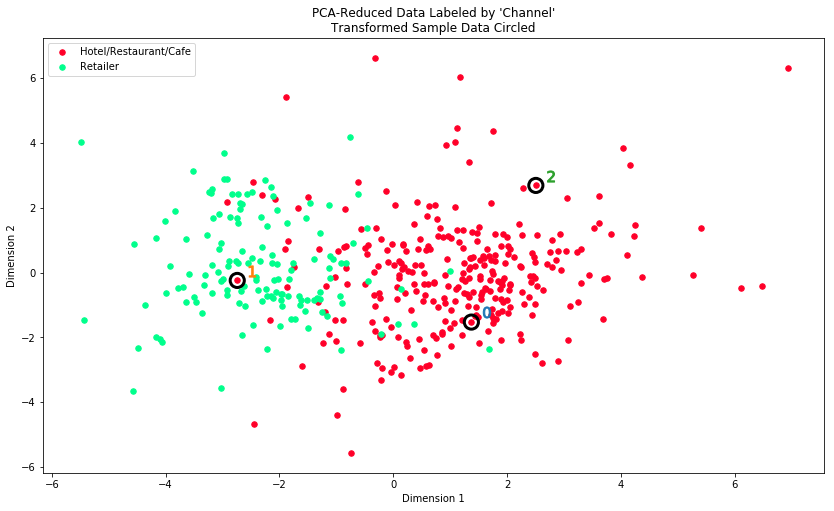

In [522]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

In [544]:
from sklearn.metrics import accuracy_score

new_preds = [x+1 for x in preds]
new_GMpreds = []
for item in GMpreds:
    if item == 0:
        new_GMpreds.append(2)
    else:
        new_GMpreds.append(1)
        
print "Accuracy score for K-means: {:.4f}".format(accuracy_score(channel_data, new_preds))

print "Accuracy score for Gaussian Mixture: {:.4f}".format(accuracy_score(channel_data, new_GMpreds))

Accuracy score for K-means: 0.8891
Accuracy score for Gaussian Mixture: 0.9007


### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

**Both the K-Means and Gaussian Mixture models do a good job of correctly grouping the dataset into 2 clusters consistent with the Channel feature. However, as seen in the Channel labeled data, there is some overlap. There are some (six?) "Retailer" data points that fall into the cluster most consistent with Hotel/Restaurant/Cafe. However, there are many (30+) Hotel/Restaurant/Cafe data points that fall into the "Retailer" cluster. Interestingly, one of these just happened to be my 2nd sample point which seemed to suggest strongly that it would be in the "Retailer" cluster.**

**It seems to be that there is more variability in the type of purchases by customers in the Hotel/Cafe/Restaurant businesses, causing the overlap in clusters. This suggests that the soft clustering algorithm may have been the best choice for this dataset.**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.